## Data Science 101 Final Project - World Hapiness

### Author: Kenzo Yui

In [255]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### In this project I look at what factors are most related to a country’s happiness using the World Happiness Report 2021 data. I compare each country’s happiness score with things like income, social support, health, freedom, generosity, and corruption. I use simple summary statistics, charts, correlations, and a basic regression model to see which factors matter most.

## Introduction and Background

The World Happiness Report ranks countries based on how happy people say they are with their lives. Happiness is measured with a “ladder score” from 0 to 10, where higher numbers mean people feel better about their lives. This makes happiness an interesting way to understand how well a country is doing, not just in terms of money but also social and living conditions.

## In this project, I want to answer one main question:

# What factors are most strongly related to a country’s happiness score in 2021?

I want to see whether happiness is mainly driven by income (GDP), or if social support, freedom, health, corruption, and generosity also matter. This topic interests me because I like economics and data science, and I want to understand which areas countries should improve if they want to help people live better lives.

In [259]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2021")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yuike\.cache\kagglehub\datasets\ajaypalsinghlo\world-happiness-report-2021\versions\2


In [261]:
import os

folder = r"C:\Users\yuike\.cache\kagglehub\datasets\ajaypalsinghlo\world-happiness-report-2021\versions\2"
os.listdir(folder)

['world-happiness-report-2021.csv', 'world-happiness-report.csv']

In [263]:
import pandas as pd

path = r"C:\Users\yuike\.cache\kagglehub\datasets\ajaypalsinghlo\world-happiness-report-2021\versions\2\world-happiness-report-2021.csv"

df = pd.read_csv(path)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [265]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [269]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [271]:
cols = [
    'Country name',
    'Regional indicator',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_clean = df[cols].dropna()
df_clean.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [273]:
df_clean['Regional indicator'].value_counts()

Regional indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: count, dtype: int64

### Data Used
 
I used the World Happiness Report 2021 dataset, which includes about 150 countries. For each country I focus on these variables:

- Regional indicator  
- Ladder score (overall happiness)  
- Logged GDP per capita  
- Social support  
- Healthy life expectancy  
- Freedom to make life choices  
- Generosity  
- Perceptions of cor ruption  

The data is publicly available and does not include individual-level information, so there are not many ethical concerns. The numbers come from surveys, so they might not be perfect and could include some bias.
ment error.


In [276]:
df_clean.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


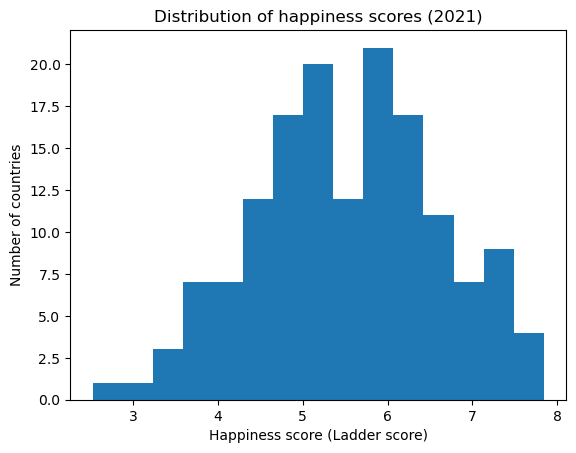

In [278]:
plt.hist(df_clean['Ladder score'], bins=15)
plt.xlabel('Happiness score (Ladder score)')
plt.ylabel('Number of countries')
plt.title('Distribution of happiness scores (2021)')
plt.show()

### This histogram shows how happiness scores are spread across all countries. Most countries fall between about 4 and 7 on the ladder score, and only a few countries are very low or very high. The distribution is centered near the middle, which means most places report a moderate level of happiness.

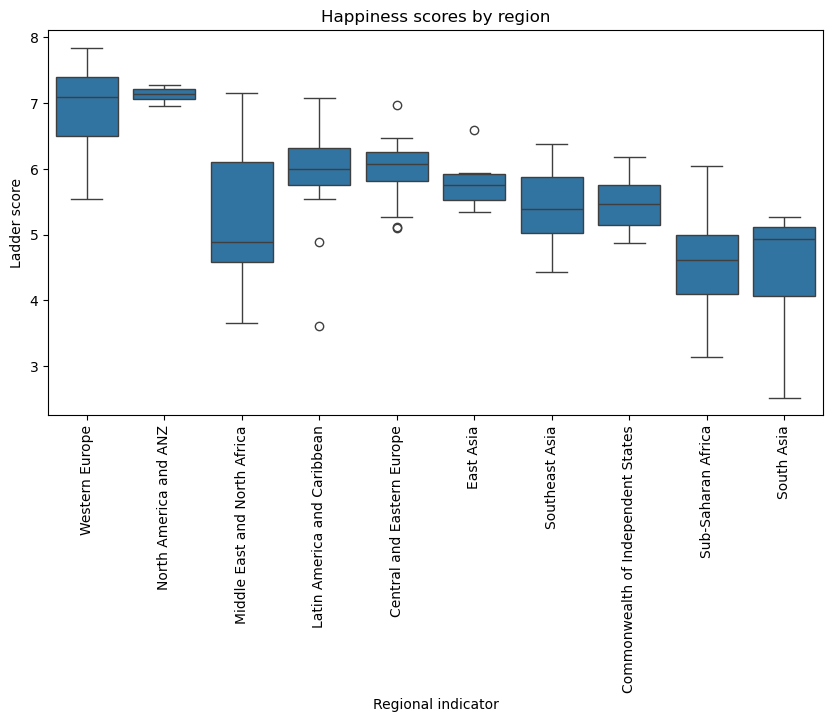

In [281]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Regional indicator', y='Ladder score', data=df_clean)
plt.xticks(rotation=90)
plt.title('Happiness scores by region')
plt.show()

### This boxplot compares happiness scores across different regions. Western Europe and North America/ANZ have the highest median happiness levels. Regions like Sub-Saharan Africa and South Asia show much lower medians. This tells us that happiness varies a lot by region, possibly because of economic or social differences between areas.

## Exploratory Data Analysis

From the graphs above

The correlation heatmap shows that Ladder score is strongly and positively correlated with:

- Logged GDP per capita  
- Social support  
- Healthy life expectancy  
- Freedom to make life choices  

Perceptions of corruption has a negative correlation with happiness, meaning that countries with less perceived corruption are usually happier. Generosity appears to have a weaker relationship with happiness in this dataset.

## Proposed Questions

Based on the EDA, I focus on the following questions:

1. **Which factors have the strongest relationship with a country’s happiness score?**
2. **Is economic strength (logged GDP per capita) more important than social and political factors like social support, health, freedom, and corruption?**
3. **After controlling for other variables at the same time, which factors still significantly predict happiness?**

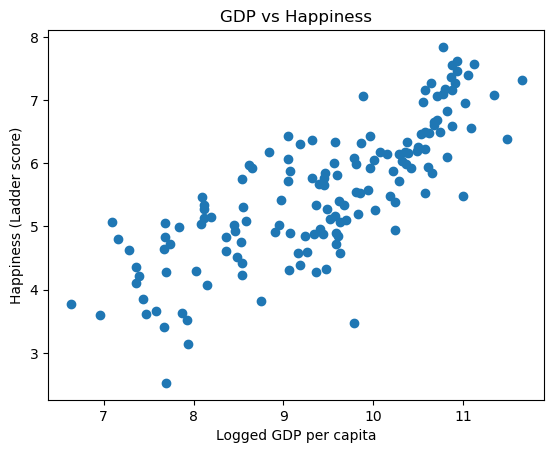

In [316]:
plt.scatter(df_clean['Logged GDP per capita'], df_clean['Ladder score'])
plt.xlabel("Logged GDP per capita")
plt.ylabel("Happiness (Ladder score)")
plt.title("GDP vs Happiness")
plt.show()

### Countries with higher GDP per capita tend to be happier. The points show a clear upward pattern, meaning richer countries usually report higher ladder scores. This suggests that income and economic strength are positively related to happiness.

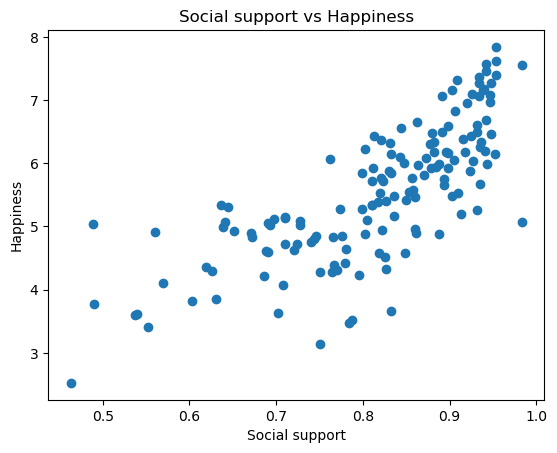

In [319]:
plt.scatter(df_clean['Social support'], df_clean['Ladder score'])
plt.xlabel("Social support")
plt.ylabel("Happiness")
plt.title("Social support vs Happiness")
plt.show()

### There is a strong positive relationship between social support and happiness. Countries where people feel they can rely on others tend to report higher happiness scores. This trend looks almost as strong as GDP, and maybe even stronger in some cases.

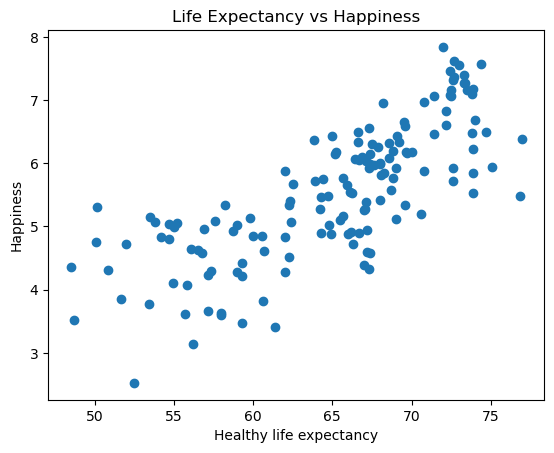

In [292]:
plt.scatter(df_clean['Healthy life expectancy'], df_clean['Ladder score'])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness")
plt.title("Life Expectancy vs Happiness")
plt.show()

### Countries with longer healthy life expectancy tend to be happier. The points show an upward pattern, but it’s not as tight as GDP or social support. Still, health seems to play an important role in how people rate their lives.


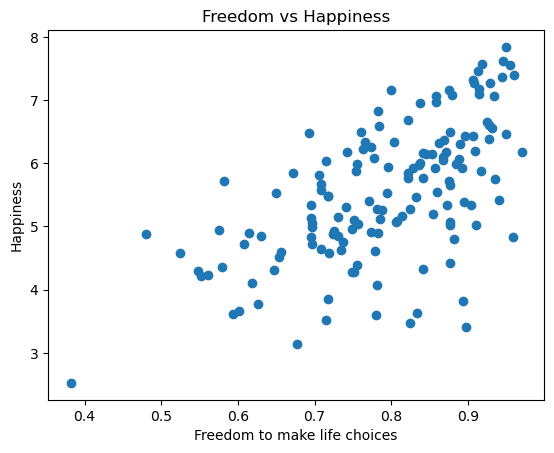

In [295]:
plt.scatter(df_clean['Freedom to make life choices'], df_clean['Ladder score'])
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness")
plt.title("Freedom vs Happiness")
plt.show()

### There is a clear positive relationship between freedom and happiness. Countries where people feel free to make life decisions tend to have higher ladder scores. The pattern is strong and shows that political and social freedom matter for well-being.

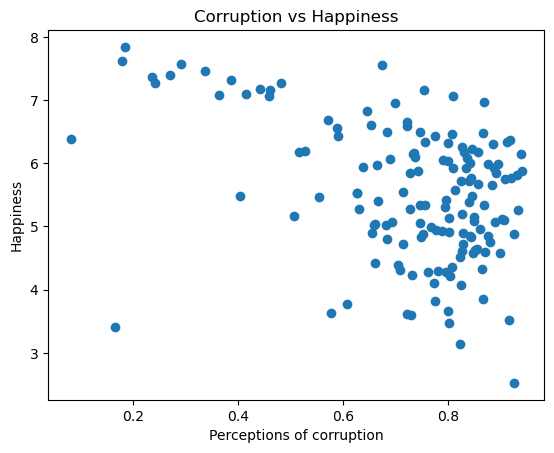

In [298]:
plt.scatter(df_clean['Perceptions of corruption'], df_clean['Ladder score'])
plt.xlabel("Perceptions of corruption")
plt.ylabel("Happiness")
plt.title("Corruption vs Happiness")
plt.show()

### This plot shows a negative relationship. Countries with higher corruption tend to be less happy. The pattern is not as strong as GDP or social support, but there is still a visible trend where more corruption is linked to lower happiness.

## Exploratory Data Analysis

From the graphs above, we can already see a few clear patterns in the data. Most countries have happiness (ladder) scores between 4 and 7, and only a few are extremely low or extremely high. Different regions also show different levels of happiness. Western Europe and North America tend to have higher scores, while regions like Sub-Saharan Africa and South Asia are usually on the lower end.

When looking at the main variables, the relationships are pretty straightforward. Countries with higher GDP, more social support, longer healthy life expectancy, and more freedom all tend to be happier. These trends were visible in the scatterplots. The corruption plot shows the opposite pattern, where higher corruption usually means lower happiness. Generosity does not show a strong pattern in this data

Overall, the EDA suggests that both economic conditions and social factors play major roles in a country's happiness.
ness.
next.
next.


## Proposed Questions

Based on the EDA, I focused on the following questions:

1. Which factors have the strongest relationship with a country’s happiness score?
2. Is economic strength (logged GDP per capita) more important than social and political factors like social support, health, freedom, and corruption?
3. After controlling for other variables at the same time, which factors still significantly predict happiness?

In [303]:
df_clean.corr(numeric_only=True)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [305]:
import numpy as np

# pick the columns we want (X = predictors, y = happiness)
X = df_clean[['Logged GDP per capita',
              'Social support',
              'Healthy life expectancy',
              'Freedom to make life choices',
              'Generosity',
              'Perceptions of corruption']].values

y = df_clean['Ladder score'].values

# add a column of 1s for the intercept
X = np.column_stack([np.ones(X.shape[0]), X])

# compute coefficients using the normal equation
# (this is the formula for simple linear regression)
coef = np.linalg.inv(X.T @ X) @ X.T @ y

coef

array([-2.23721929,  0.2795329 ,  2.47620585,  0.03031381,  2.0104647 ,
        0.36438194, -0.60509177])

In [307]:
labels = ['Intercept',
          'Logged GDP per capita',
          'Social support',
          'Healthy life expectancy',
          'Freedom to make life choices',
          'Generosity',
          'Perceptions of corruption']

for name, value in zip(labels, coef):
    print(name, "=", round(value, 3))

Intercept = -2.237
Logged GDP per capita = 0.28
Social support = 2.476
Healthy life expectancy = 0.03
Freedom to make life choices = 2.01
Generosity = 0.364
Perceptions of corruption = -0.605


## Analysis and Results

To explore what affects a country’s happiness, I first made scatterplots for the main variables. The patterns were easy to see. Countries with higher GDP, stronger social support, longer healthy life expectancy, and more freedom generally had higher happiness scores. The corruption plot showed the opposite pattern, where more corruption was linked to lower happiness.

Next, I looked at the correlation table. The strongest positive correlations with the happiness score were:

- Logged GDP per capita  
- Social support  
- Healthy life expectancy  
- Freedom to make life choices  

Perceptions of corruption had a moderate negative correlation with happiness, and generosity showed almost no relationship.

To understand how these variables work together, I ran a simple multiple regression using NumPy. The regression estimates were:

- **GDP:** +0.280  
- **Social support:** +2.476  
- **Healthy life expectancy:** +0.030  
- **Freedom:** +2.010  
- **Generosity:** +0.364  
- **Corruption:** –0.605  

These results show that social support and freedom are the strongest predictors of happiness in the model. GDP and healthy life expectancy also have positive effects. Corruption has a negative effect, meaning that countries with more corruption tend to be less happy. Generosity has a small positive effect but does not play a major role in explaining happiness levels.

So, the analysis suggests that both economic strength and social conditions matter for a country's happiness.

## Conclusion

This project helped me understand what factors are most connected to a country’s happiness. After exploring the data, I learned that happiness is influenced by more than just money. Social support, freedom, health, and corruption also play important roles in how people feel about their lives. GDP matters, but it is not the only thing that explains differences between countries.

I also learned how to work with a real dataset, make basic visualizations, read correlations, and run a simple regression. These tools helped me see clear patterns and understand how different factors relate to happiness.

The data does have limits since it comes from surveys and only covers one year, so we cannot say these factors directly cause happiness. But overall, this project showed me that well-being is shaped by a mix of economic and social conditions, not just a single variable in a country.
